In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [29]:
df = pd.read_csv('titanic_toy.csv')

In [30]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [31]:
X = df.drop(columns=['Survived'])
y  = df['Survived']

In [32]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
X_train['Age_99'] =  X_train['Age'].fillna(99)
X_train['Age_minus1'] =  X_train['Age'].fillna(-1)

X_train['Fare_999'] =  X_train['Fare'].fillna(999)
X_train['Fare_minus1'] =  X_train['Fare'].fillna(-1)

In [34]:
print('Original Age vairable variance : ',X_train['Age'].var())
print('Age variance after 99 imputation : ',X_train['Age_99'].var())
print('Age variance after minus1 imputation : ',X_train['Age_minus1'].var())

print('Original Fare vairable variance : ',X_train['Fare'].var())
print('Fare variance after 99 imputation : ',X_train['Fare_999'].var())
print('Fare variance after minus1 imputation : ',X_train['Fare_minus1'].var())

Original Age vairable variance :  204.34951339046142
Age variance after 99 imputation :  951.7275570187188
Age variance after minus1 imputation :  318.0896202624488
Original Fare vairable variance :  2448.1979137063163
Fare variance after 99 imputation :  47219.202652176304
Fare variance after minus1 imputation :  2378.5676784883494


TypeError: A single argument passed to legend() must be a list of labels, but found an Artist in there.

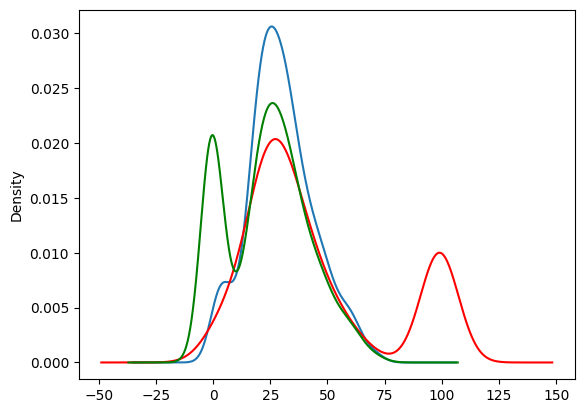

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax)

X_train['Age_99'].plot(kind='kde',ax=ax,color = "red")

X_train['Age_minus1'].plot(kind='kde',ax=ax , color = "green")

lines , labels = ax.get_legend_handles_labels()
ax.legend(lines,loc="best")

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax)

X_train['Fare_99'].plot(kind='kde',ax=ax,color = "red")

X_train['Fare_minus1'].plot(kind='kde',ax=ax , color = "green")

lines , labels = ax.get_legend_handles_labels()
ax.legend(lines,loc="best")

In [36]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


X_train.corr()

# Using Sklearn

In [52]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [54]:
trf = ColumnTransformer(
    [
        ("imputer1",imputer1,['Age']),
        ("imputer2",imputer2,['Fare'])
    ],
remainder='passthrough')

In [55]:
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [56]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [57]:
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [58]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [59]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [60]:
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [61]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [62]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

# When to use arbitary value imputation

In [ ]:
# 1)when data is not missing at random
# 